# 5. 응용문제
## 16. 미로찾기 알고리즘

다음 그림과 같이 미로의 형태와 출발점과 도착점이 주어졌을 때 출발점에서 도착점까지 가기 위한 최단 경로를 찾는 알고리즘을 만들어 보세요.

### 1. 문제 분석과 모델링

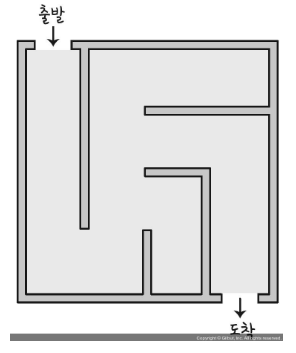

위의 문제는 사람에게는 쉽지만 컴퓨터에게 이 문제를 이해하고 풀게 할 아이디어를 찾는 것이 쉽지 않다. 이 때 필요한 것이 '모델링(모형화)'이다. 모델링이란 주어진 현실의 문제를 정형화하거나 단순화하여 수학이나 컴퓨터 프로그램으로 쉽게 설명할 수 있도록 다시 표현하는 것이다. 

#### 문제의 모델링    

- 1단계    

미로를 풀기 위해 미로 안의 공간을 정형화한다. 위의 그림은 4x4로 구성된 간단한 미로이다. 먼저 이동 가능한 위치를 각각의 구역으로 나누고, 구역마다 알파벳으로 이름을 붙이면 아래와 같다.

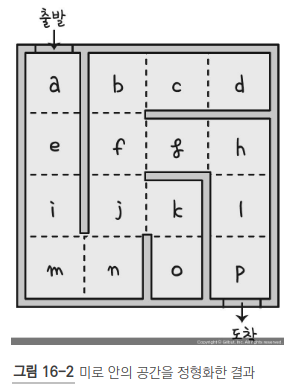

이 모델(모형)을 이용해 미로 찾기 문제와 정답을 적어보면 아래와 같다.

출발점 a에서 시작해 벽으로 막히지 않은 위치로 차례로 이동하여 도착점 p에 이르는 가장 짧은 경로를 구하고 그 과정에서 지나간 위치의 이름을 출력해 보시오.

정답: a,e,i,m,n,j,f,g,h,l,p

- 2단계

최종 결과를 얻으려면 각 위치 사이의 관계를 컴퓨터에게 알려줘야 하고 실제로 미로를 푸는 알고리즘도 만드어야 한다. 어려워 보이지만 이 문제는 그래프 탐색 문제와 같다. 

위치 16개를 각각 꼭지점으로 만들고 각 위치에서 벽으로 막히지 않아 이동할 수 있는 이웃한 위치를 모두 선으로 연결하면 아래와 같이 미로 정보가 그래프로 그려진다.

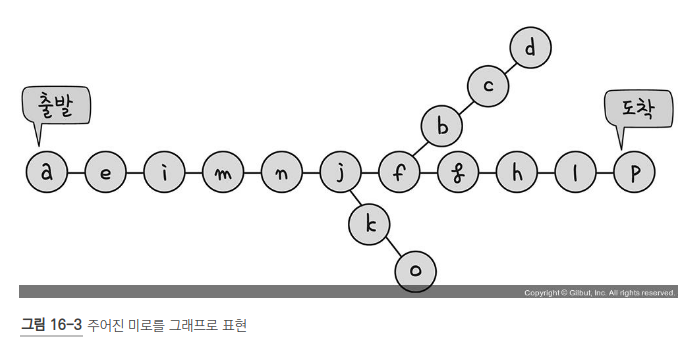

- 3단계

이 그래프를 딕셔너리로 바꾸면 아래와 같다.

```python
# 미로 정보

# 미로의 각 위치에 알파벳으로 이름을 지정

# 각 위치에서 한 번에 이동할 수 있는 모든 위치를 선으로 연결하여 그래프로 표현

maze = {
    'a': ['e'],
    'b': ['c', 'f'],
    'c': ['b', 'd'],
    'd': ['c'],
    'e': ['a', 'i'],
    'f': ['b', 'g', 'j'],
    'g': ['f', 'h'],
    'h': ['g', 'l'],
    'i': ['e', 'm'],
    'j': ['f', 'k', 'n'],
    'k': ['j', 'o'],
    'l': ['h', 'p'],
    'm': ['i', 'n'],
    'n': ['m', 'j'],
    'o': ['k'],
    'p': ['l']

}
```

### 2. 미로 찾기 알고리즘
미로 찾기 문제가 모델링을 통해 그래프가 되고, 그래프가 파이썬 언어가 이해할 수 있는 딕셔너리로 표현되었다. 남은 일은 그래프 탐색 알고리즘을 적용해 출발점부터 도착점까지 탐색하는 프로그램을 만드는 것이다. 

In [7]:
# 미로 찾기 프로그램(그래프 탐색)
# 입력: 미로 정보 g, 출발점 start, 도착점 end
# 출력: 미로를 나가기 위한 이동 경로는 문자열, 나갈 수 없는 미로면 물음표("?")

def solve_maze(g, start, end):
    qu = []          # 기억 장소 1: 앞으로 처리해야 할 이동 경로를 큐에 저장
    done = set()  # 기억 장소 2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복 방지)
    
    qu.append(start)   # 출발점을 큐에 넣고 시작
    done.add(start)     # 집합에도 추가
    
    while qu:         # 큐에 처리할 경로가 남아 있으면
        p = qu.pop(0)     # 큐에서 처리 대상을 꺼냄
        v = p[-1]  # 큐에 저장된 이동 경로의 마지막 문자가 현재 처리해야 할 꼭짓점
        if v == end:  # 처리해야 할 꼭짓점이 도착점이면(목적지 도착!)
            return p   # 지금까지의 전체 이동 경로를 돌려주고 종료
        for x in g[v]:     # 대상 꼭짓점에 연결된 꼭짓점들 중에
            if x not in done:    # 아직 큐에 추가된 적이 없는 꼭짓점을
                qu.append(p+x)   # 이동 경로에 새 꼭짓점으로 추가하여 큐에 저장하고
                done.add(x)    # 집합에도 
                
     # 탐색을 마칠 때까지 도착점이 나오지 않으면 나갈 수 없는 미로임
    return "?"

In [8]:
maze = {
    'a': ['e'],
    'b': ['c', 'f'],
    'c': ['b', 'd'],
    'd': ['c'],
    'e': ['a', 'i'],
    'f': ['b', 'g', 'j'],
    'g': ['f', 'h'],
    'h': ['g', 'l'],
    'i': ['e', 'm'],
    'j': ['f', 'k', 'n'],
    'k': ['j', 'o'],
    'l': ['h', 'p'],
    'm': ['i', 'n'],
    'n': ['m', 'j'],
    'o': ['k'],
    'p': ['l']
}

print(solve_maze(maze, 'a', 'p'))

aeimnjfghlp


In [11]:
# 미로 찾기 프로그램(그래프 탐색)
# 입력: 미로 정보 g, 출발점 start, 도착점 end
# 출력: 미로를 나가기 위한 이동 경로는 문자열, 나갈 수 없는 미로면 물음표("?")

def solve_maze(g, start, end):
    qu = []          # 기억 장소 1: 앞으로 처리해야 할 이동 경로를 큐에 저장
    done = set()  # 기억 장소 2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복 방지)
    
    qu.append(start)   # 출발점을 큐에 넣고 시작
    done.add(start)     # 집합에도 추가
    
    while qu:         # 큐에 처리할 경로가 남아 있으면
        p = qu.pop(0)     # 큐에서 처리 대상을 꺼냄
        print("p", p)
        v = p[-1]  # 큐에 저장된 이동 경로의 마지막 문자가 현재 처리해야 할 꼭짓점
        print("v", v)
        if v == end:  # 처리해야 할 꼭짓점이 도착점이면(목적지 도착!)
            return p   # 지금까지의 전체 이동 경로를 돌려주고 종료
        for x in g[v]:     # 대상 꼭짓점에 연결된 꼭짓점들 중에
            print("g[v]", g[v])
            print("x", x)
            if x not in done:    # 아직 큐에 추가된 적이 없는 꼭짓점을
                qu.append(p+x)   # 이동 경로에 새 꼭짓점으로 추가하여 큐에 저장
                print("qu", qu)
                done.add(x)    # 집합에도 
                print("done", done)
                
     # 탐색을 마칠 때까지 도착점이 나오지 않으면 나갈 수 없는 미로임
    return "?"

In [12]:
print(solve_maze(maze, 'a', 'p'))

p a
v a
g[v] ['e']
x e
qu ['ae']
done {'a', 'e'}
p ae
v e
g[v] ['a', 'i']
x a
g[v] ['a', 'i']
x i
qu ['aei']
done {'i', 'a', 'e'}
p aei
v i
g[v] ['e', 'm']
x e
g[v] ['e', 'm']
x m
qu ['aeim']
done {'i', 'm', 'a', 'e'}
p aeim
v m
g[v] ['i', 'n']
x i
g[v] ['i', 'n']
x n
qu ['aeimn']
done {'m', 'n', 'i', 'a', 'e'}
p aeimn
v n
g[v] ['m', 'j']
x m
g[v] ['m', 'j']
x j
qu ['aeimnj']
done {'m', 'j', 'n', 'i', 'a', 'e'}
p aeimnj
v j
g[v] ['f', 'k', 'n']
x f
qu ['aeimnjf']
done {'m', 'j', 'n', 'i', 'f', 'a', 'e'}
g[v] ['f', 'k', 'n']
x k
qu ['aeimnjf', 'aeimnjk']
done {'k', 'm', 'j', 'n', 'i', 'f', 'a', 'e'}
g[v] ['f', 'k', 'n']
x n
p aeimnjf
v f
g[v] ['b', 'g', 'j']
x b
qu ['aeimnjk', 'aeimnjfb']
done {'k', 'b', 'm', 'j', 'n', 'i', 'f', 'a', 'e'}
g[v] ['b', 'g', 'j']
x g
qu ['aeimnjk', 'aeimnjfb', 'aeimnjfg']
done {'k', 'b', 'm', 'j', 'n', 'i', 'f', 'a', 'e', 'g'}
g[v] ['b', 'g', 'j']
x j
p aeimnjk
v k
g[v] ['j', 'o']
x j
g[v] ['j', 'o']
x o
qu ['aeimnjfb', 'aeimnjfg', 'aeimnjko']
done {'k', 'b

이 알고리즘은 그래프 탐색 과정에서 지금까지 지나온 경로를 문자열로 만들어 큐에 추가한 것과 탐색 중 목적지에 도착하면 탐색을 멈추도록 한 것을 제외하면 문제 15의 그래프 탐색 알고리즘과 완전히 같은 알고리즘이다.

### 3. 응용문제 풀이 과정
현실 세계의 문제를 컴퓨터로 풀려면 문제를 분석해 효과적인 모델(모형)을 만드는 것이 가장 중요한 첫걸음이다. 먼제 문제를 잘 모델링하고, 그 모델에 여러 가지 알고리즘을 적용해 문제를 푼 다음 그 결과를 다시 실제 세계에 적용하는 것이다. 이는 실생활 문제를 컴퓨터를 사용해서 푸는 일반적인 과정이기도 하다. 

## 17. 가짜 동전 찾기 알고리즘
겉보기에는 똑같은 동전이 n개 있습니다. 이 중에서 한 개는 싸고 가벼운 재료로 만들어진 ‘가짜 동전’입니다. 좌우 무게를 비교할 수 있는 양팔 저울을 이용해서 다른 동전보다 가벼운 가짜 동전을 찾아내는 알고리즘을 만들어 보세요.

### 1. 문제 분석과 모델링
문제를 좀 더 정형화해 보자. 동전 개수는 n개이므로 왼쪽에서 오른쪽으로 동전을 일렬로 나열한 다음 맨 왼쪽을 0번으로 하여 차례대로 번호를 붙이면, 가장 오른쪽에 있는 동전은 n-1번이 됩니다.

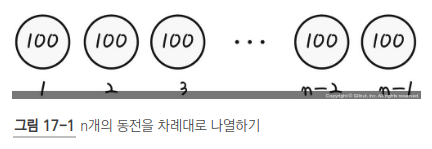
 
즉 0번부터 n-1번까지 동전이 있고 이 중에 가짜 동전이 한 개 있는데, 우리가 만들 알고리즘은 양팔 저울로 저울질하여 가짜 동전의 위치 번호를 알아내는 것이다.

‘저울질’에 해당하는 기능을 프로그램으로 구현할 수 있는 함수를 하나 만든다. 

```python
def weigh(a,b,c,d):
```
weigh() 함수는 a부터 b까지 동전을 양팔 저울의 왼쪽에, c부터 d까지 동전을 저울의 오른쪽에 올리고 저울질하는 함수이다. 이때 비교하는 동전의 개수는 같다고 가정한다(b - a = d - c).

이 함수 안에 변수 fake를 만들고 찾아야 할 가짜 동전의 위치를 저장한다. 가짜 동전 찾기 알고리즘은 fake 변수의 값을 직접 알 수는 없고, weigh() 함수를 호출해서 이 값을 찾아야 한다.

weigh() 함수의 결괏값은 -1, 0, 1 세 가지 중 하나이다. a\~b 쪽이 가볍다면 a와 b 사이에 가짜 동전이 있다는 뜻이고, 결괏값으로 -1을 돌려준다. 마찬가지로 c\~d 쪽이 가볍다면 c와 d 사이에 가짜 동전이 있다는 뜻이고, 결괏값으로 1을 돌려준다. 양쪽 무게가 같다면 어느 쪽도 가짜 동전이 없다는 뜻이고, 결괏값으로 0을 돌려준다. 이때는 저울에 올리지 않은 동전 중에 가짜 동전이 있다는 의미이다.

지금까지 설명한 weigh() 함수의 동작을 그림으로 표현하면 아래와 같다.

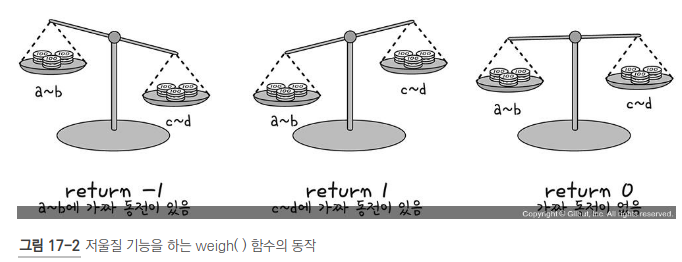

### 2. 방법 ①: 하나씩 비교하기

동전 n개에 0부터 n-1까지 번호를 매기고 weigh() 함수를 이용해서 각 동전의 무게를 비교할 수 있도록 모델링을 마쳤다.

무게가 적게 나가는 가짜 동전이 한 개만 있다고 했으므로 각 동전의 무게를 비교해서 가벼운 동전이 나온다면 그 동전이 바로 가짜 동전이다. 0번 동전을 저울의 왼쪽에 올려놓고, 오른편에는 1번 동전부터 차례로 바꿔 가면서 저울질하면 가짜 동전을 쉽게 찾아낼 수 있다.

0번과 1번 동전을 비교하는 첫 번째 저울질에서 왼쪽이 가볍다면 0번 동전이 가짜 동전이고, 오른쪽이 가볍다면 1번 동전이 가짜 동전이다. 두 동전의 무게가 같다면 둘 다 가짜 동전이 아니므로 오른쪽에 2번 동전을 올리고 이 과정을 반복한다.

이렇게 저울질을 하면 마지막 n-1번 동전이 가짜 동전일 경우(최악의 경우) 저울질을 n-1번 해야 가짜 동전을 찾아낼 수 있다.

>이 방법은 원하는 값을 찾기 위해 자료를 차례로 하나씩 비교하는 순차 탐색과 비슷하다.

In [5]:
# 주어진 동전 n개 중에 가짜 동전(fake)을 찾아내는 알고리즘
# 입력: 전체 동전 위치의 시작과 끝(0, n - 1)
# 출력: 가짜 동전의 위치 번호
# 무게 재기 함수
# a에서 b까지에 놓인 동전과
# c에서 d까지에 놓인 동전의 무게를 비교
# a에서 b까지에 가짜 동전이 있으면(가벼우면): -1
# c에서 d까지에 가짜 동전이 있으면(가벼우면): 1
# 가짜 동전이 없으면(양쪽 무게가 같으면): 0

def weigh(a, b, c, d):
    fake = 29
    if a <= fake and fake <= b:
        return -1
    if c <= fake and fake <= d:  
        return 1
    return 0

# weigh( ) 함수(저울질)를 이용하여
# left에서 right까지에 놓인 가짜 동전의 위치를 찾아냄

def find_fakecoin(left, right):  
    for i in range(left+1, right+1):  
        result = weigh(left, left, i, i)  
        if result == -1:
            return left
    
        elif result == 1:   
            return i  
        
    return -1

In [6]:
n = 100
print(find_fakecoin(0, n-1))

29


### 3. 방법 ②: 반씩 그룹으로 나누어 비교하기
위의 방법으로도 가짜 동전을 쉽게 찾아낼 수 있지만 저울질을 훨씬 덜 하고도 가짜 동전을 찾아낼 수 있는 방법이 있다. 바로 동전을 절반씩 나눠서 무게를 재보는 것이다.

주어진 동전을 절반씩 두 그룹으로 나눠서 양팔 저울에 올렸을 때 한쪽이 가볍다면 그 가벼운 쪽에 가짜 동전이 있다는 뜻이다. 따라서 반대쪽에 있는 절반의 동전은 더는 생각할 필요가 없고 가벼운 쪽에 있는 동전만을 대상으로 다시 가짜 동전을 찾으면 된다. 이렇게 하면 저울질 한 번으로 남은 동전 절반이 후보에서 탈락한다. 

남은 동전의 개수가 홀수일 때는 어떻게 반으로 나눌까? 예를 들어 가짜 동전 후보로 동전이 일곱 개 남아 있다고 가정하자. 동전 일곱 개를 세 개, 세 개, 나머지 한 개 이렇게 세 그룹으로 나눈 후 개수가 세 개로 같은 두 그룹만 저울에 올린다.

왼쪽이 가볍다면 왼쪽에 올린 동전 세 개 중에 가짜 동전이 있을 것이고, 반대로 오른쪽이 가볍다면 오른쪽에 올린 동전 세 개 중에 가짜 동전이 있을 것이다. 두 그룹의 무게가 같다면 저울에 올리지 않은 나머지 동전 하나가 가짜 동전이라는 뜻이다.

In [17]:
# 주어진 동전 n개 중에 가짜 동전(fake)을 찾아내는 알고리즘
# 입력: 전체 동전 위치의 시작과 끝(0, n - 1)
# 출력: 가짜 동전의 위치 번호

# 무게 재기 함수
# a에서 b까지에 놓인 동전과
# c에서 d까지에 놓인 동전의 무게를 비교
# a에서 b까지에 가짜 동전이 있으면(가벼우면): -1
# c에서 d까지에 가짜 동전이 있으면(가벼우면): 1
# 가짜 동전이 없으면(양쪽 무게가 같으면): 0

def weigh(a, b, c, d):
    fake = 29
    
    if a <= fake and fake <= b:
        return -1
    
    if c <=fake and fake <=d:
        return 1
    return 0

# weigh( ) 함수(저울질)를 이용하여
# left에서 right까지에 놓인 가짜 동전의 위치를 찾아냄

def find_fakecoint(left, right):
    # 종료조건: 가짜 조건이 있을 범위 안에 동전이 1개뿐이면 그 동전이 가짜 동전임
    if left == right:
        return left
    
    # left에서 right까지에 놓인 동전을 두 그룹(g1_left~g1_right, g2_left~g2_right)으로 나눔
    # 동전 수가 홀수면 두 그룹으로 나누고 한 개가 남음
    
    half = (right - left + 1) // 2
    g1_left = left
    g1_right = left + half - 1
    g2_left = left + half
    g2_right = g2_left + half - 1
    
    # 나눠진 두 그룹을 weigh( ) 함수를 이용하여 저울질함
    result = weigh(g1_left, g1_right, g2_left, g2_right)
    if result == -1:   # 그룹 1이 가벼움(가짜 동전이 이 그룹에 있음)
        return find_fakecoin(g1_left, g1_right)   # 그룹 1 범위를 재귀 호출로 다시 조사
    elif result == 1:   # 그룹 2가 가벼움(가짜 동전이 이 그룹에 있음)
        return find_fakecoin(g2_left, g2_right)   # 그룹 2 범위를 재귀 호출로 다시 조사
    else:     # 두 그룹의 무게가 같으면(나뉜 두 그룹 안에 가짜 동전이 없다면)
        return right      # 두 그룹으로 나뉘지 않고 남은 나머지 한 개의 동전이 가짜 동전임

In [19]:
n = 100   # 전체 동전 개수
print(find_fakecoin(0, n-1))

29


### 4. 알고리즘 분석
이 문제의 알고리즘 효율성을 ‘저울질 횟수’를 기준으로 생각해 보자. 0번 동전과 나머지 동전을 일일이 비교하는 방법은 저울질이 최대 n-1번(n-2번) 필요하므로 계산 복잡도가 O(n)이다. -> 순차 탐색과 비슷

동전 n개를 절반씩 나누어 후보를 좁히며 비교하는 방법은 계산 복잡도가 O(logn)이다. (만약 주어진 동전을 세 그룹으로 나누면 O($log_3 n$)으로도 가짜 동전을 찾을 수 있다. 이 계산 복잡도는 O(logn)과 같다.) -> 이분 탐색과 비슷
 
## 18. 최대 수익 알고리즘
어떤 주식에 대해 특정 기간 동안의 가격 변화가 주어졌을 때, 그 주식 한 주를 한 번 사고팔아 얻을 수 있는 최대 수익을 계산하는 알고리즘을 만들어 보세요.

어떤 주식의 가격이 아래와 같이 매일 변했다고 하자. 이 주식 한 주를 한 번 사고팔아 얻을 수 있는 최대 수익은 얼마일까? (단, 손해가 나면 주식을 사고팔지 않아도 된다. 따라서 최대 수익은 항상 0 이상이다.)

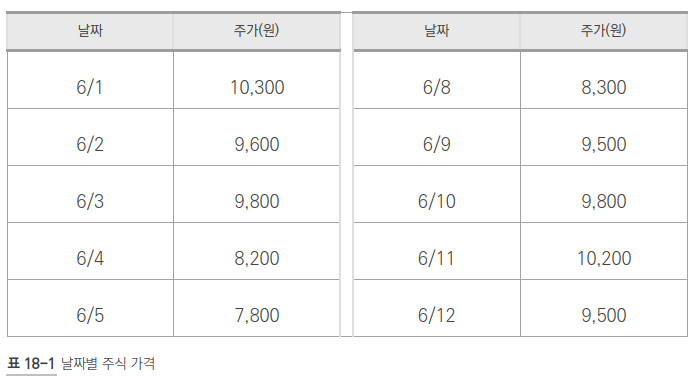

### 1. 문제 분석과 모델링
주식 거래로 수익을 내는 가장 좋은 방법은 ‘가장 쌀 때 사서 가장 비쌀 때 파는 것’이다. 얼핏 생각하면 주가(주식의 가격)의 최댓값에서 주가의 최솟값을 뺀 것으로 착각하기 쉽다. 표 18-1을 예로 들면, 6월 1일의 주가 10,300원이 최댓값이고 6월 5일의 주가 7,800원이 최솟값이다. 하지만 아직 사지도 않은 주식을 6월 1일에 먼저 팔고 6월 5일에 주식을 살 수는 없으므로 단순히 최댓값과 최솟값을 구하는 것만으로는 올바른 답을 얻을 수 없다.

주어진 정보는 날짜와 주가 정보이고, 이 문제는 얻을 수 있는 최대 수익만 물어보았으므로 정확한 날짜 정보는 없어도 상관없다. 따라서 정보를 단순화하여 각 날의 주식 가격만 뽑아 stock이라는 리스트로 만든다.

stock = [10300, 9600, 9800, 8200, 7800, 8300, 9500, 9800, 10200, 9500]

이 리스트 값을 이용해서 얻을 수 있는 최대 수익을 계산해 보자!

### 2. 방법 ①: 가능한 모든 경우를 비교하기
가장 간단한 방법은 주식을 살 수 있는 모든 날과 팔 수 있는 모든 날의 주가를 비교해서 가장 큰 수익을 찾는 것이다.

예를 들어 첫째 날 10,300원에 주식을 샀다면 둘째 날부터의 주식 가격인 9,600원, 9,800원 … 9,500원 중 하나로 주식을 팔 기회가 생긴다. 둘째 날 9,600원에 주식을 샀다면 셋째 날부터의 주식 가격인 9,800원, 8,200원 … 9,500원 중 하나로 주식을 팔 기회가 생긴다.

이런 식으로 모든 경우를 비교해서 가장 큰 이익을 내는 경우를 찾으면 원하는 최대 수익을 계산할 수 있다. 이 문제는 문제 3 동명이인 찾기에서 가능한 모든 사람을 비교하던 방식과 똑같다.

```python
# 리스트 안에 있는 n개 자료를 빠짐없이 한 번씩 비교하는 방법
for i in range(0, n-1):
    for j in range(i+1, n):
     # i와 j로 필요한 비교
```
이 경우 비교 횟수는 $\frac{n(n-1)}{2}$번이고, 계산 복잡도는 $O(n^2)$이다. 

In [30]:
# 주어진 주식 가격을 보고 얻을 수 있는 최대 수익을 구하는 알고리즘
# 입력: 주식 가격의 변화 값(리스트: prices)
# 출력: 한 주를 한 번 사고팔아 얻을 수 있는 최대 수익 값

def max_profit(prices):
    n = len(prices)
    max_profit = 0 
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            profit = prices[j] - prices[i]  # i날에 사서 j날에 팔았을 때 얻을 수 있는 수익
            
            if profit > max_profit:
                max_profit = profit
                
    return max_profit

In [31]:
stock = [10300, 9600, 9800, 8200, 7800, 8300, 9500, 9800, 10200, 9500]

print(max_profit(stock))

2400


### 3. 방법 ②: 한 번 반복으로 최대 수익 찾기

모든 경우를 비교하는 방법은 간단하고 직관적이지만, 불필요한 비교를 너무 많이 한다. 이 방법이 사는 날을 중심으로 생각한 것이라면 이번에는 파는 날을 중심으로 생각을 바꿔보자. 예를 들어 6월 10일에 9,800원을 받고 주식을 팔았다고 가정하면 이때 얻을 수 있는 최고 수익은 6월 10일 이전에 가장 주가가 낮았던 날인 6월 5일에 7,800원에 산 경우이므로 2,000원이다. 만약 6월 11일에 10,200원에 팔았다면, 6월 5일 7,800원과의 차이인 2,400원이 최대 수익이다. 즉 파는 날을 기준으로 이전 날들의 주가 중 최솟값만 알면 최대 수익을 쉽게 계산할 수 있다. 

1 | 최대 수익을 저장하는 변수를 만들고 0을 저장한다.

2 | 지금까지의 최저 주가를 저장하는 변수를 만들고 첫째 날의 주가를 기록한다. 

3 | 둘째 날의 주가부터 마지막 날의 주가까지 반복한다. 

4 | 반복하는 동안 그날의 주가에서 최저 주가를 뺀 값이 현재 최대 수익보다 크면 최대 수익 값을 그 값으로 고친다. 

5 | 그날의 주가가 최저 주가보다 낮으면 최저 주가 값을 그날의 주가로 고친다.

6 | 처리할 날이 남았으면 4번 과정으로 돌아가 반복하고, 다 마쳤으면 최대 수익에 저장된 값을 결괏값으로 돌려주고 종료한다.

In [9]:
# 주어진 주식 가격을 보고 얻을 수 있는 최대 수익을 구하는 알고리즘
# 입력: 주식 가격의 변화 값(리스트: prices)
# 출력: 한 주를 한 번 사고팔아 얻을 수 있는 최대 수익 값

def max_profit(prices):
    n = len(prices)
    max_profit = 0
    min_price = prices[0]  # 우선 첫번째 가격을 최소 주가로 설정
    
    for i in range(1, n):
        profit = prices[i] - min_price
        if profit > max_profit:
            max_profit = profit
        if prices[i] < min_price:  # i날 주가가 최솟값보다 작으면 값을 고침
            min_price = prices[i]  
            
    return max_profit

In [10]:
stock = [10300, 9600, 9800, 8200, 7800, 8300, 9500, 9800, 10200, 9500]

print(max_profit(stock))

2400


In [7]:
# 주어진 주식 가격을 보고 얻을 수 있는 최대 수익을 구하는 알고리즘
# 입력: 주식 가격의 변화 값(리스트: prices)
# 출력: 한 주를 한 번 사고팔아 얻을 수 있는 최대 수익 값

def max_profit(prices):
    n = len(prices)
    max_profit = 0
    min_price = prices[0]  # 우선 첫번째 가격을 최소 주가로 설정
    
    for i in range(1, n):
        profit = prices[i] - min_price
        print("prices[i]", prices[i])
        print("min_price", min_price)
        if profit > max_profit:
            max_profit = profit
            print("max_profit", max_profit)
        if prices[i] < min_price:
            min_price = prices[i]
            print("min_price", min_price)
            
    return max_profit

In [8]:
stock = [10300, 9600, 9800, 8200, 7800, 8300, 9500, 9800, 10200, 9500]

print(max_profit(stock))

prices[i] 9600
min_price 10300
min_price 9600
prices[i] 9800
min_price 9600
max_profit 200
prices[i] 8200
min_price 9600
min_price 8200
prices[i] 7800
min_price 8200
min_price 7800
prices[i] 8300
min_price 7800
max_profit 500
prices[i] 9500
min_price 7800
max_profit 1700
prices[i] 9800
min_price 7800
max_profit 2000
prices[i] 10200
min_price 7800
max_profit 2400
prices[i] 9500
min_price 7800
2400


### 4. 알고리즘 분석
모든 경우를 비교한 첫 번째 알고리즘은 문제 3 동명이인 찾기와 비슷한 구조이고, 계산 복잡도는 $O(n^2)$이다. 반면 리스트를 한 번 탐색하면서 최대 수익을 계산한 두 번째 알고리즘은 문제 2 최댓값 찾기와 비슷한 구조로 게산 복잡도는 O(n)이다.

입력 크기가 커질수록 두 번째 알고리즘이 첫 번째 알고리즘보다 결과를 빨리 낼 것이다. 최대 수익 문제를 두 가지 다른 방법으로 풀 때 걸리는 시간을 비교하는 프로그램은 아래와 같다. 

In [35]:
# 최대 수익 문제를 푸는 두 알고리즘의 계산 속도 비교하기
# 최대 수익 문제를 O(n * n)과 O(n)으로 푸는 알고리즘을 각각 수행하여
# 걸린 시간을 출력/비교함

import time      # 시간 측정을 위한 time 모듈
import random    # 테스트 주가 생성을 위한 random 모듈

def max_profit_slow(prices):
    n = len(prices)
    max_profit = 0
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            profit = prices[j] - prices[i]
            if profit > max_profit:
                max_profit = profit
                
    return max_profit

def max_profit_fast(prices):
    n = len(prices)
    max_profit = 0
    min_price = prices[0]
    
    for i in range(1, n):
        profit = prices[i] - min_price
        if profit > max_profit:
            max_profit = profit
            
        if prices[i] < min_price:
            min_price = prices[i]
            
    return max_profit

def test(n):
    # 테스트 자료 만들기(5000부터 20000까지의 난수를 주가로 사용)
    a = []
    for i in range(0, n):
        a.append(random.randint(5000, 20000))
        
    # 느린 O(n * n) 알고리즘 테스트
    start = time.time()        # 계산 시작 직전 시각을 기억
    mps = max_profit_slow(a)    # 계산 수행
    end = time.time()          # 계산 시작 직후 시각을 기억
    time_slow = end - start    # 직후 시각에서 직전 시각을 빼면 계산에 걸린 시간
    
    # 빠른 O(n) 알고리즘 테스트
    start = time.time()   # 계산 시작 직전 시각을 기억
    mpf = max_profit_fast(a)   # 계산 수행
    end = time.time()  # 계산 시작 직후 시각을 기억
    time_fast = end - start    # 직후 시각에서 직전 시각을 빼면 계산에 걸린 시간
    
    # 결과 출력: 계산 결과
    print(n, mps, mpf)   # 입력 크기, 각각 알고리즘이 계산한 최대 수익 값(같아야 함)
    
    
    # 결과 출력: 계산 시간 비교
    m = 0
    if time_fast > 0:    # 컴퓨터 환경에 따라 빠른 알고리즘 시간이 0으로 측정될 수 있음
                         # 이럴 때는 0을 출력
        m = time_slow / time_fast
        
    # 입력 크기, 느린 알고리즘 수행 시간, 빠른 알고리즘 수행 시간, 계산 시간 차이
    # %d는 정수 출력, %.5f는 소수점 다섯 자리까지 출력을 의미
    print("%d %.5f %.5f %.2f" %(n, time_slow, time_fast, m))

In [36]:
test(100)

test(10000)

100 14895 14895
100 0.00043 0.00001 34.08
10000 14994 14994
10000 3.64562 0.00073 5005.18


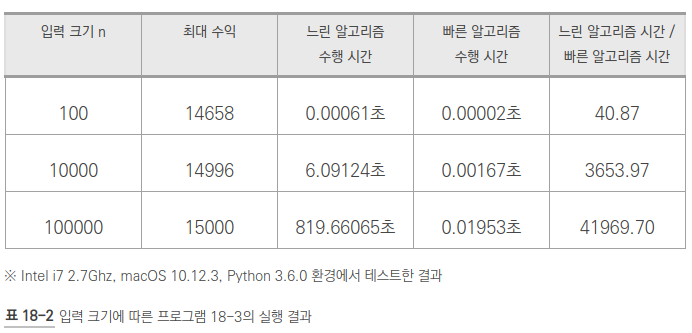

실행 결과를 보면 입력 크기를 100으로 입력했을 때는 빠른 알고리즘과 느린 알고리즘의 계산 시간 차이가 40배 정도 난다. 입력 크기를 10,000과 100,000으로 입력했더니 차이가 3,700배와 42,000배로 급격히 벌어지는 것을 확인할 수 있다. 입력 크기가 더 커진다면 두 알고리즘으로 답을 찾는 데 걸리는 시간의 격차는 훨씬 더 벌어질 것이다.
